The primary objective of this exploratory data analysis (EDA) project is to uncover insights from Hillary Clinton's emails using NLP and statistical methods. The project aims to:

1) Identify the common topics discussed using TF-IDF
2) Understand the network of senders and recipients to identify key figures and their relationships.
   Explore the frequency and patterns of email communications over time.


**Data Cleaning and Preprocessing:** This initial step involves cleaning the dataset for analysis, including handling missing values, removing duplicates, and standardizing date formats. NLP-specific preprocessing will also be necessary, such as tokenization, removing stopwords, and lemmatization.

**Exploratory Data Analysis:** Employing statistical and visualization techniques to summarize the dataset's main characteristics. This includes analyzing the distribution of emails over time, the most frequent senders and recipients, and the length of emails.

**TF-IDF:** Using NLP techniques such as TF-IDF or count vectorization generate a list of the five TF-IDF terms that best describe the emails. This can provide insights into the main topics and themes discussed in the emails.

**Temporal Analysis:** Investigate how email communications change over time, identify any patterns or anomalies in the volume of emails sent and received, and correlate these with external events or timelines.


**Imports**

In [1]:
import pandas as pd
import numpy as np
import sklearn
%pip install gensim
import gensim as gensim
import matplotlib.pyplot as plt
%pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
import string

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Read csv file**

In [2]:
emails = pd.read_csv("Emails.csv")

**(1a) Data Cleaning: General** 

Handling Missing Values

In [3]:
emails['ExtractedBodyText'].fillna('null', inplace=True)

/tmp/ipykernel_545/1073708052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  emails['ExtractedBodyText'].fillna('null', inplace=True)


**Removing Duplicates**

There are no complete duplicates, which is good.

In [4]:
# Detect and display duplicate rows based on all columns
duplicate_rows = emails[emails.duplicated()]

In [5]:
duplicate_rows

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText


Duplicate Body Text: FYI and ok with varying case are the most commonly repeated messages.

In [6]:
# Exclude rows with 'null' in 'ExtractedBodyText'
filtered_emails = emails[emails['ExtractedBodyText'] != 'null']

# Detect and display duplicate rows based on the 'ExtractedBodyText' column
duplicate_body = filtered_emails[filtered_emails.duplicated(subset='ExtractedBodyText', keep=False)]
duplicate_body.head(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",UNCLASSIFIED\nU.S. Department of State\nCase N...
11,12,C05739565,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739565...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739565,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",UNCLASSIFIED\nU.S. Department of State\nCase N...
12,13,C05739567,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739567...,F-2015-04841,...,NaN,"Sullivan, Jacob J <SullivanJJ@state.gov>",NaN,"Wednesday, September 12 2012 700 PM",F-2015-04841,C05739567,05/13/2015,RELEASE IN PART,Fyi,UNCLASSIFIED\nU.S. Department of State\nCase N...
22,23,C05739580,H: MAGARIAF ON ATTACK ON US IN LIBYA. SID,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739580...,F-2015-04841,...,'Russorv@stategov',H <hrod17©clintonemaiLcom>,NaN,"Wednesday, September 12, 2012 11:30 PM",F-2015-04841,C05739580,05/13/2015,RELEASE IN PART,Pis print.,UNCLASSIFIED\nU.S. Department of State\nCase N...
24,25,C05739586,PROPOSED QUAD DEAL,H,"Sullivan, Jacob J",87.0,2011-03-23T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739586...,F-2015-04841,...,NaN,"Sullivan, Jacob .1 ‹Sullivann@state.gov>","McEldowney, Nancy E; Heffern, John A; Spence, ...","Wednesday, March 23, 2011 09:10 PM",F-2015-04841,C05739586,05/13/2015,RELEASE IN PART,B5,UNCLASSIFIED\nU.S. Department of State\nCase N...
26,27,C05739588,MORE ON LIBYA,H,"Sullivan, Jacob J",87.0,2012-09-13T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739588...,F-2015-04841,...,NaN,"Sullivan, Jacob I <Sullivanit@state,gov›",NaN,"Thursday, September 13, 2012 2:31 AM",F-2015-04841,C05739588,05/13/2015,RELEASE IN PART,Will do.,UNCLASSIFIED\nU.S. Department of State\nCase N...
27,28,C05739589,AMB STEVENS,H,"Mills, Cheryl D",32.0,2012-09-13T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739589...,F-2015-04841,...,NaN,"Mills, Cheryl 0 <MillsCD@stategov>","Macmanus, Joseph E (S[)ialAssistants; Abbaszad...","Wednesday, September 12, 2012 8:52 AM",F-2015-04841,C05739589,05/13/2015,RELEASE IN PART,Remind me to discuss,UNCLASSIFIED\nU.S. Department of State\nCase N...
30,31,C05739592,QUICK SUMMARY OF POTUS CALLS TO PRESIDENTS OF ...,H,"Sullivan, Jacob J",87.0,2012-09-13T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739592...,F-2015-04841,...,NaN,"McDonough, Denis R. (mailto: B6",NaN,"Thursday, September 13, 2012 1:26 PM",F-20

In [7]:
# Exclude rows with 'null' in 'ExtractedBodyText'
filtered_emails = emails[emails['ExtractedBodyText'] != 'null']

# Group by 'ExtractedBodyText' and count occurrences
duplicate_counts = filtered_emails['ExtractedBodyText'].value_counts()

# Create a DataFrame with 'ExtractedBodyText' and its corresponding counts
duplicate_counts_df = pd.DataFrame({'ExtractedBodyText': duplicate_counts.index, 'Occurrences': duplicate_counts.values})

# Display the DataFrame
duplicate_counts_df.head(10)

,ExtractedBodyText,Occurrences
0,Fyi,174
1,FYI,156
2,Ok,76
3,fyi,64
4,Ok.,39
5,Pls print.,32
6,Will do.,30
7,Yes,15
8,Pis print.,14
9,FYI.,13


**Standardizing Date Formats**

ExtractedDateSent was standardized because it needs to understand patterns in the volume of emails sent.

In [8]:
emails['ExtractedDateSent'] = emails['ExtractedDateSent'].replace('null', pd.NaT)
emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce', infer_datetime_format=True)
emails.set_index('ExtractedDateSent', inplace=True)

/tmp/ipykernel_545/3557722988.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce', infer_datetime_format=True)


**(1b) NLP Specific Processing:** Tokenization, Removing Stopwords and Lemmatization

The lemmatizer is adapted from class notes. There may be a way to integrate the bigrams with the lemmatizer.

In [9]:
# We can use NLTK to tokenize and lemmatize our text
nltk.download('stopwords')

# Create instances of the stemmer
stemmer = PorterStemmer()

# For stopwords we will add punctuation
punct = list(string.punctuation) + list(string.digits) 
# null = list('null')  #neither of these methods
stop_words = stopwords.words('english') + punct + ['null']

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Create a list to store processed data
corpus = []

# Iterate over the rows in the 'emails' DataFrame
for index, row in emails.iterrows():
    # Extract ID and content from the DataFrame
    email_id = row['Id']
    email_content = row['ExtractedBodyText']
    
    # Tokenize and lemmatize the text
    tokens = word_tokenize(email_content)
    tokens = [stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Append ID and processed text to the corpus list
    corpus.append([email_id, ' '.join(tokens)])

In [11]:
corpus

[[1, ''],
 [2,
  'thursday march pm h latest syria aid qaddafi sid hrc memo syria aid libya hrc memo syria aid libya march hillari'],
 [3, 'thx'],
 [4, ''],
 [5,
  'h friday march pm huma abedin fw h latest syria aid qaddafi sid hrc memo syria aid libya pi print'],
 [6,
  'pi print h clintonernailcom wednesday septemb pm fw meet extremist behind film spark deadli riot meat sent wednesday septemb pm subject meet right wing extremist behind film spark deadli riot sent verizon wireless lte droid depart state case doc date state dept produc hous select benghazi comm subject agreement sensit inform redact foia waiver'],
 [7, ''],
 [8,
  'h friday march pm huma abedin fw h latest syria aid qaddafi sid hrc memo syria aid libya pi print'],
 [9, 'fyi'],
 [10,
  'wednesday septemb pm fwd libya libya sept send direct sent verizon wireless lte druid'],
 [11, 'fyi'],
 [12,
  'wednesday septemb pm fwd libya libya sept send direct sent verizon wireless lte druid'],
 [13, 'fyi'],
 [14,
  'slaughter su

Function to iterate over the text to extract our lemmas

In [12]:
def tokenize_lemmatize_text(text):
    lemmas = []  # Create a local list to store tokens for each text
    tokens = word_tokenize(text)
    for token in tokens:
        if token in stop_words:
            continue
        else:
            lemmas.append(stemmer.stem(token))
    return lemmas

Testing on one email for clarity.

In [13]:
# Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is the modified function

# Retrieve the content of the third email
third_email_content = corpus[2][1]  # Index 2 corresponds to the third element (0-based index)

# Call the function to get lemmas for the third email
third_email_lemmas = tokenize_lemmatize_text(third_email_content)

# Print the lemmas
print(third_email_lemmas)


['thx']


In [14]:
# Initialize a defaultdict to store bigram counts
bigram_freqs = {}

# Iterate over each email in the corpus
for _, email_content in corpus:
    # Tokenize and lemmatize the email content
    email_token_lemmas = tokenize_lemmatize_text(email_content)

    # Create a list of bigrams
    email_bigrams = [(email_token_lemmas[i], email_token_lemmas[i + 1]) for i in range(len(email_token_lemmas) - 1)]

    # Update the bigram frequencies
    for bigram in email_bigrams:
        bigram_freqs[bigram] = bigram_freqs.get(bigram, 0) + 1

# Create a DataFrame from the bigram frequencies
df = pd.DataFrame(list(bigram_freqs.items()), columns=['bigram', 'freq'])

# Sort the DataFrame by frequency in descending order
df = df.sort_values(by='freq', ascending=False)

# Expand bigrams into separate columns
df[['first_term', 'second_term']] = pd.DataFrame(df['bigram'].tolist(), index=df.index)


The top 50 most frequently appearing bigrams provide useful combinations. There may be a method to include these in the lemmatizer.

In [15]:
df.head(50)

,bigram,freq,first_term,second_term
1771,"(secretari, offic)",461,secretari,offic
1764,"(state, depart)",457,state,depart
122,"(unit, state)",447,unit,state
1846,"(white, hou)",416,white,hou
50,"(depart, state)",400,depart,state
1762,"(en, rout)",314,en,rout
6389,"(pm, secretari)",279,pm,secretari
6401,"(offic, pm)",263,offic,pm
888,"(secretari, state)",258,secretari,state
2,"(pm, h)",229,pm,h


**(2) Exploratory Data Analysis**

In [16]:
emails.shape

(7945, 21)

In [17]:
emails.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedCaseNumber', 'ExtractedDocNumber', 'ExtractedDateReleased',
       'ExtractedReleaseInPartOrFull', 'ExtractedBodyText', 'RawText'],
      dtype='object')

Analyzing the distribution of emails over time

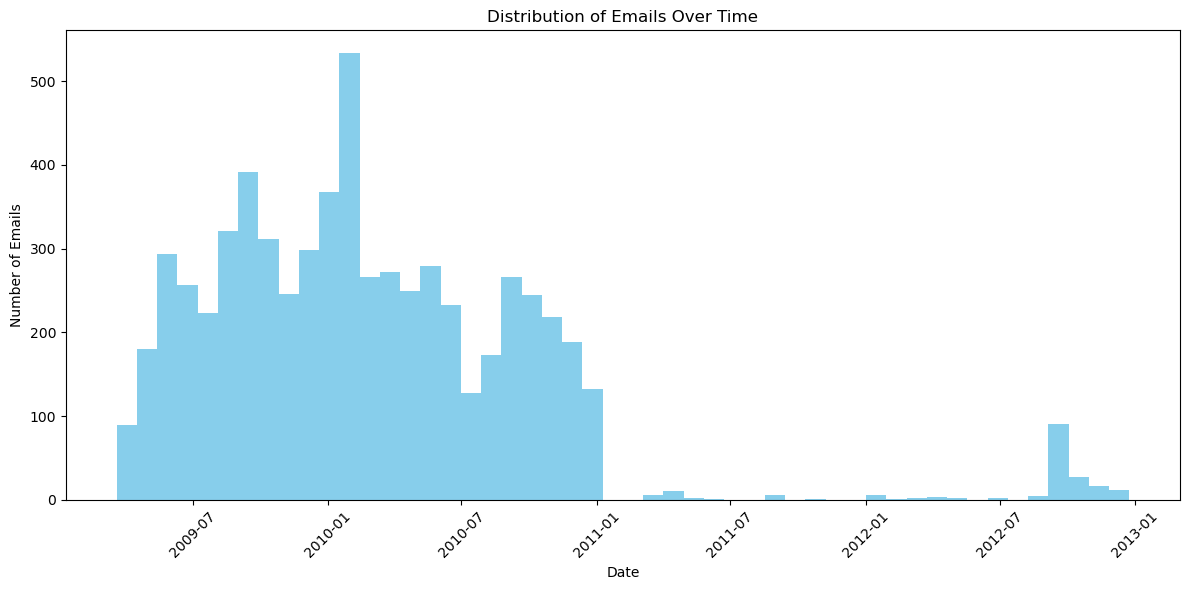

In [18]:
unfiltered_emails = pd.read_csv("Emails.csv")

# Convert 'ExtractedDateSent' to datetime format
unfiltered_emails['ExtractedDateSent'] = pd.to_datetime(unfiltered_emails['ExtractedDateSent'], errors='coerce')

# Drop rows where 'ExtractedDateSent' is missing or not a valid date
unfiltered_emails = unfiltered_emails.dropna(subset=['ExtractedDateSent'])

# Plot the distribution of emails over time
plt.figure(figsize=(12, 6))
plt.hist(unfiltered_emails['ExtractedDateSent'], bins=50, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.title('Distribution of Emails Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most frequent senders and recipients

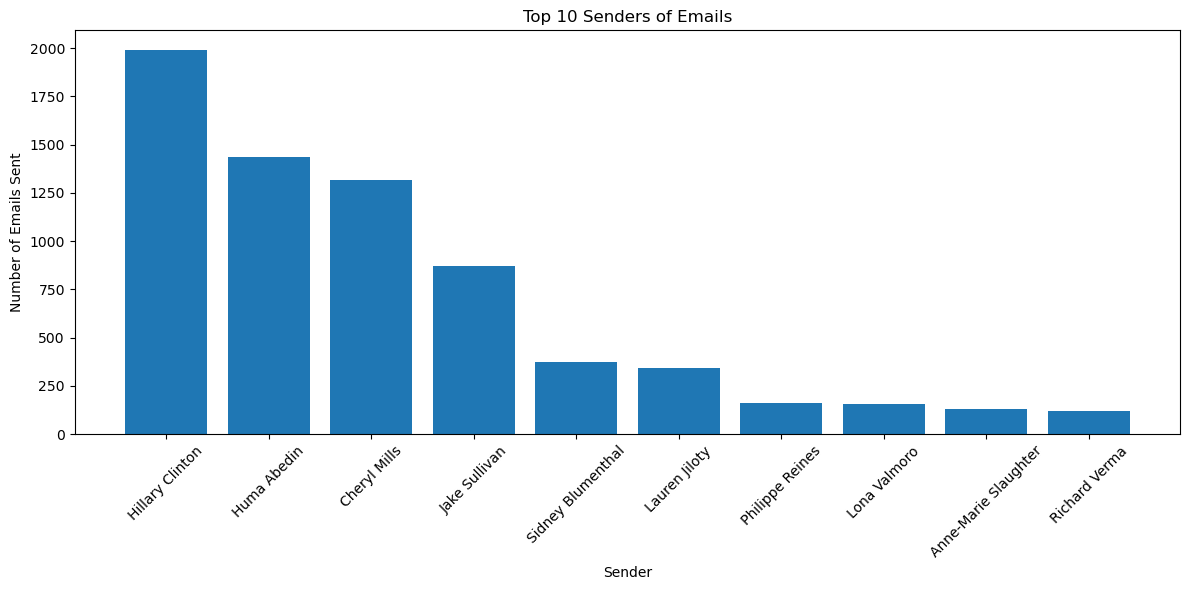

In [19]:
unf_emails = pd.read_csv("Emails.csv")
persons = pd.read_csv("Persons.csv")

# Get the count of emails sent by each sender
senders_counts = unf_emails['SenderPersonId'].value_counts().reset_index()
senders_counts.columns = ['SenderPersonId', 'EmailsSent']

# Merge with Persons.csv to get sender names
senders_counts = senders_counts.merge(persons, left_on='SenderPersonId', right_on='Id', how='left')

# Sort the data by the total count
senders_counts = senders_counts.sort_values(by='EmailsSent', ascending=False)

# Get the top 10 senders
top_senders = senders_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_senders['Name'], top_senders['EmailsSent'])
plt.xlabel('Sender')
plt.ylabel('Number of Emails Sent')
plt.title('Top 10 Senders of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

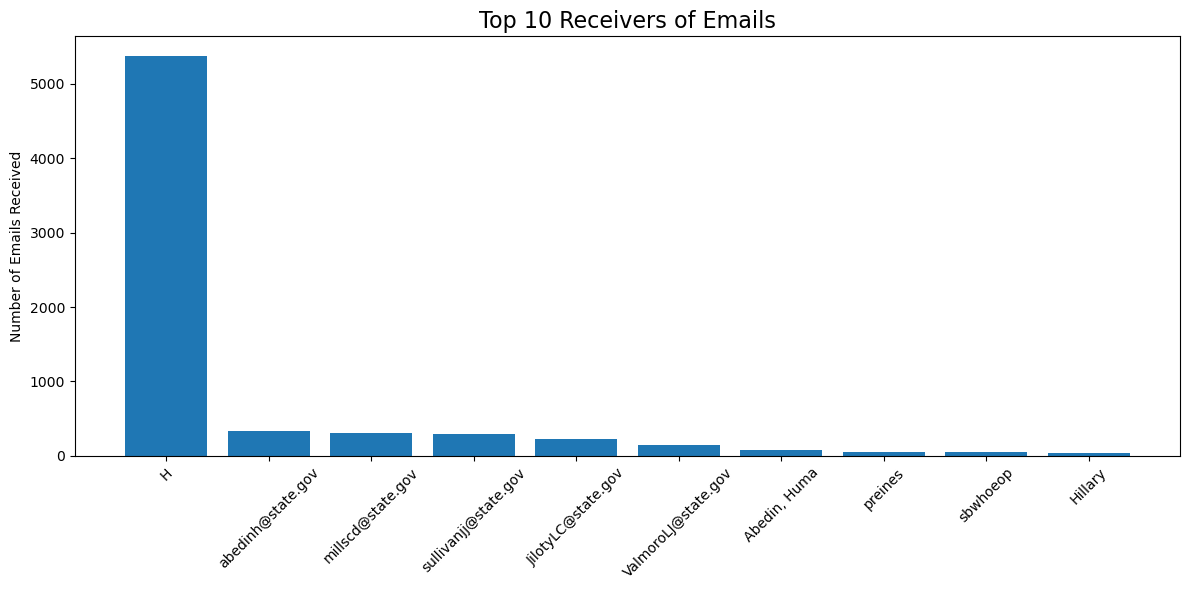

In [20]:
unf_emails = pd.read_csv("Emails.csv")

# Get the count of emails received by each receiver
receivers_counts = unf_emails.groupby('MetadataTo').size().reset_index(name='EmailsReceived')

# Fill missing values with 0
receivers_counts = receivers_counts.fillna(0)

# Sort the data by the total count
receivers_counts = receivers_counts.sort_values(by='EmailsReceived', ascending=False)

# Get the top 10 receivers
top_receivers = receivers_counts.head(10)

# Plot for receivers
plt.figure(figsize=(12, 6))
plt.bar(top_receivers['MetadataTo'], top_receivers['EmailsReceived'])
plt.ylabel('Number of Emails Received')
plt.title('Top 10 Receivers of Emails', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmas = [stemmer.stem(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return lemmas

# Tokenize and lemmatize the 'ExtractedBodyText' column
emails['ProcessedText'] = emails['ExtractedBodyText'].apply(lambda x: tokenize_and_lemmatize(x) if isinstance(x, str) else [])

# Display the DataFrame with the processed text
print(emails[['ExtractedBodyText', 'ProcessedText']].head())

                                                     ExtractedBodyText  \
ExtractedDateSent                                                        
2012-09-12 10:16:00                                               null   
NaT                  B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...   
2012-09-12 11:52:00                                                Thx   
NaT                                                               null   
NaT                  H <hrod17@clintonemail.com>\nFriday, March 11,...   

                                                         ProcessedText  
ExtractedDateSent                                                       
2012-09-12 10:16:00                                                 []  
NaT                  [thursday, march, pm, h, latest, syria, aid, q...  
2012-09-12 11:52:00                                              [thx]  
NaT                                                                 []  
NaT                  [h, friday, march, pm,

Length of emails

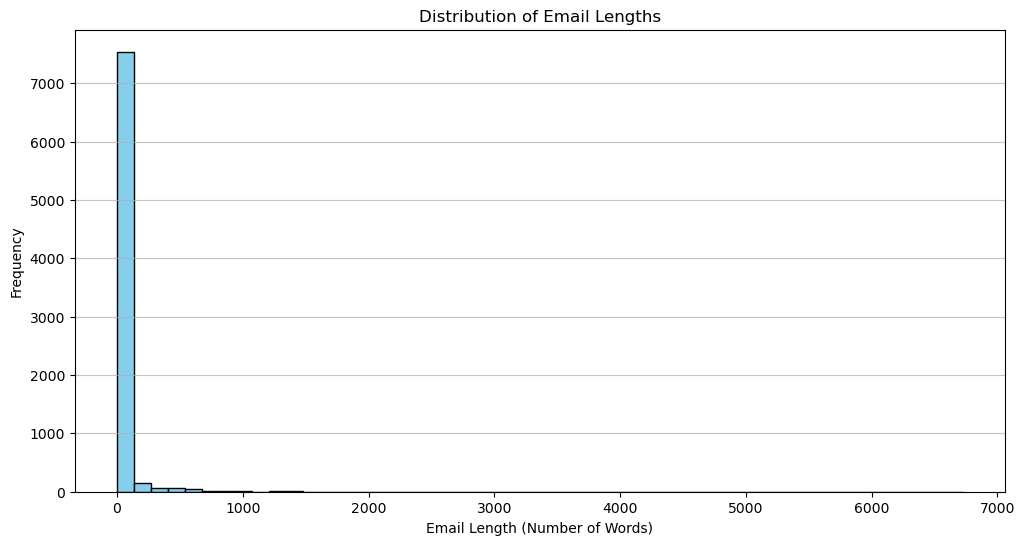

In [22]:
# Calculate the length of each email (number of words)
emails['EmailLength'] = emails['ProcessedText'].apply(len)

# Plot the distribution of email lengths
plt.figure(figsize=(12, 6))
plt.hist(emails['EmailLength'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.grid(axis='y', alpha=0.75)
plt.show()

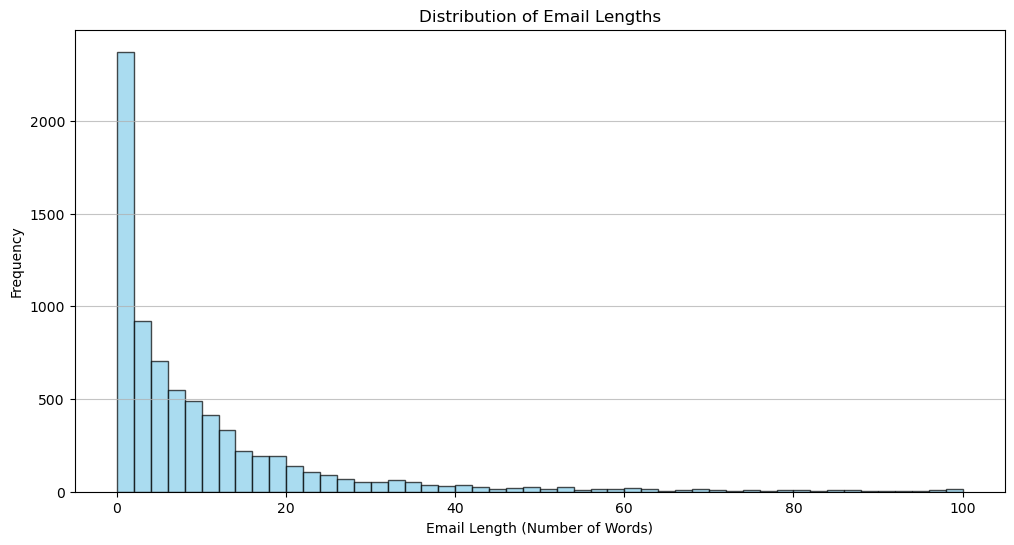

In [23]:
# Set a cap for email length
cap = 100
filtered_lengths = [length for length in emails['EmailLength'] if length <= cap]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.grid(axis='y', alpha=0.75)
plt.show()

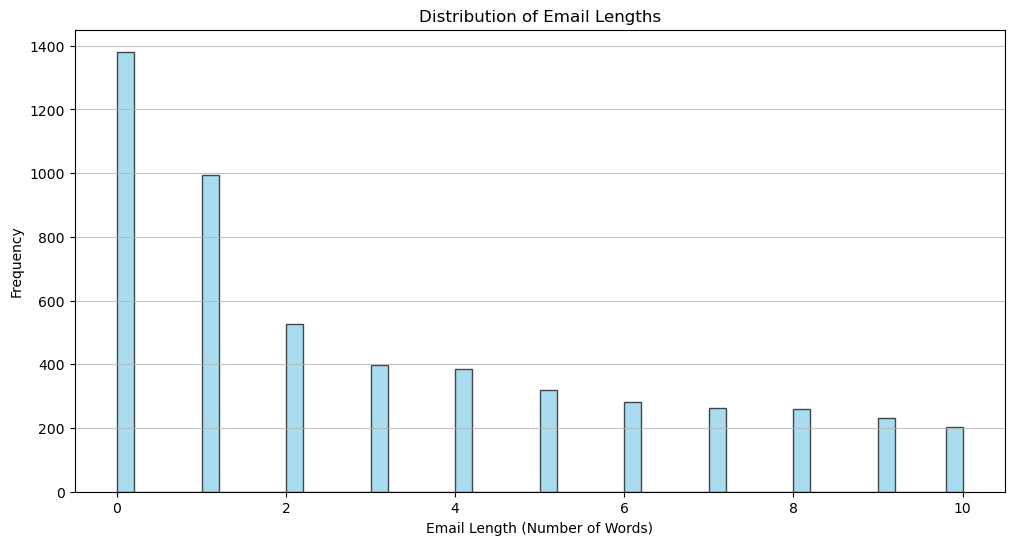

In [24]:
# Set a cap for email length
cap = 10
filtered_lengths = [length for length in emails['EmailLength'] if length <= cap]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.grid(axis='y', alpha=0.75)
plt.show()

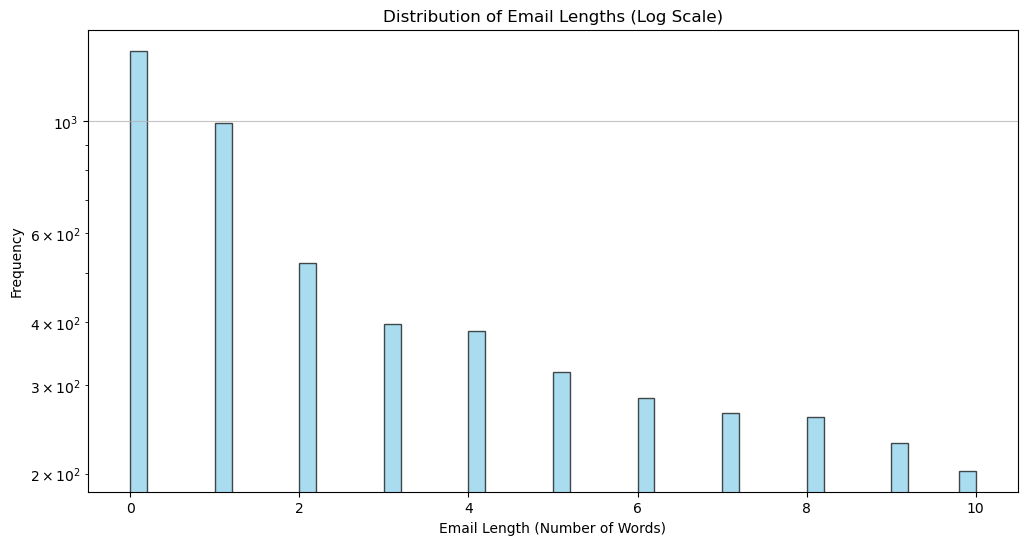

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(filtered_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.yscale('log')  # Set y-axis scale to log
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths (Log Scale)')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [26]:
import pandas as pd

# First, filter out emails with missing body text
filtered_emails = emails.dropna(subset=['ExtractedBodyText'])

# Calculate the length of each email
filtered_emails['EmailLength'] = filtered_emails['ExtractedBodyText'].apply(lambda x: len(x.split()))

# Calculate the average email length for each sender
avg_length_per_sender = filtered_emails.groupby('MetadataFrom')['EmailLength'].mean().reset_index()

# Sort senders by average email length in descending order
top_senders_lengthy_emails = avg_length_per_sender.sort_values(by='EmailLength', ascending=False).head(10)

# Display the top 10 senders of lengthy emails
print(top_senders_lengthy_emails)


            MetadataFrom  EmailLength
188     Philippe, Reines  4887.000000
46               Chelsea  3492.000000
133       Lewis, Reta Jo  2336.000000
214                Sandy  2288.000000
175      Newmyer, Jackie  1129.250000
53     Coleman, Claire L  1040.833333
199  Reines, Phillippe I  1026.000000
196     Reines, Philippe   801.000000
78       Farrow, Jeffrey   716.000000
285             sbwhoeop   710.079114


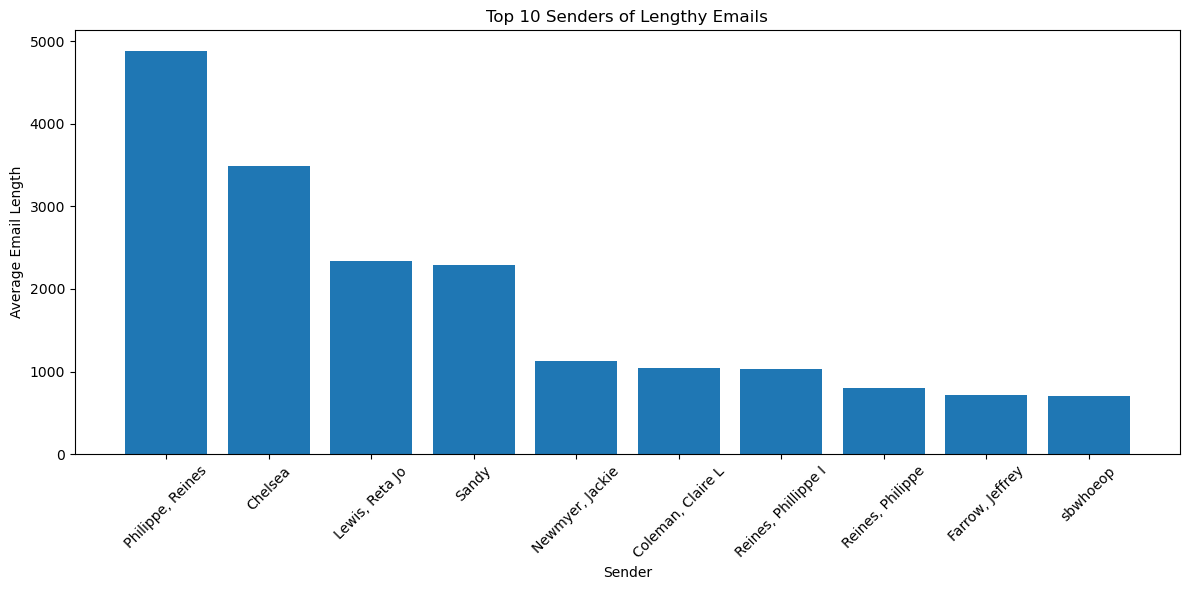

In [27]:
# Plot the top 10 senders of lengthy emails
plt.figure(figsize=(12, 6))
plt.bar(top_senders_lengthy_emails['MetadataFrom'], top_senders_lengthy_emails['EmailLength'])
plt.xlabel('Sender')
plt.ylabel('Average Email Length')
plt.title('Top 10 Senders of Lengthy Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_545/2474225327.py:17: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = grouped.groupby(['YearMonth'])['EmailsSent'].transform(max) == grouped['EmailsSent']


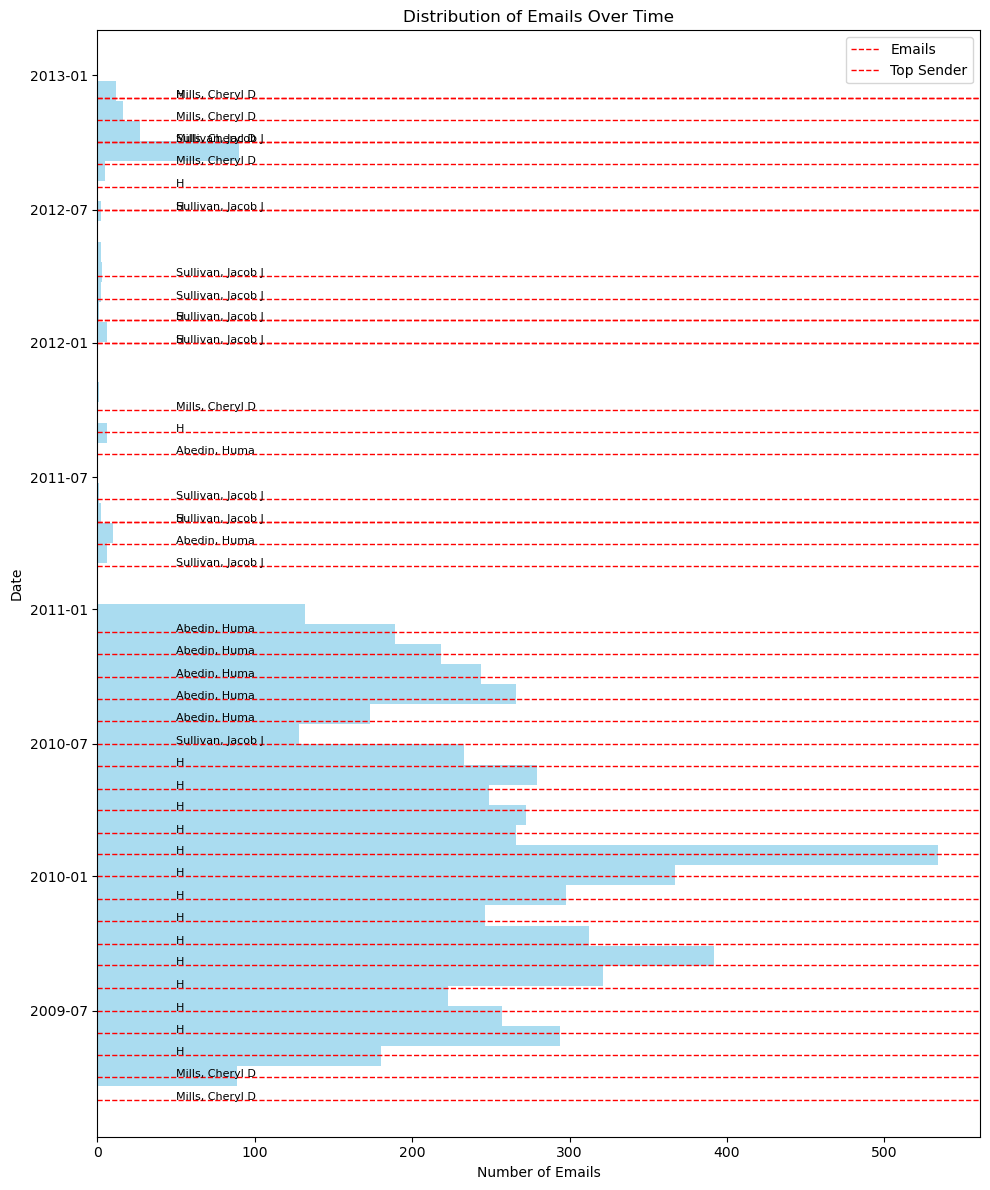

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

emails = pd.read_csv('Emails.csv')

# Convert 'ExtractedDateSent' to datetime format
emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce')

# Drop rows where 'ExtractedDateSent' is missing or not a valid date
emails = emails.dropna(subset=['ExtractedDateSent'])

# Group by sender and time period (e.g., month)
emails['YearMonth'] = emails['ExtractedDateSent'].dt.to_period('M')
grouped = emails.groupby(['YearMonth', 'MetadataFrom']).size().reset_index(name='EmailsSent')

# Find the sender who sent the most emails in each time period
idx = grouped.groupby(['YearMonth'])['EmailsSent'].transform(max) == grouped['EmailsSent']
top_senders = grouped[idx]

# Plot the distribution of emails over time
plt.figure(figsize=(10, 12))
plt.hist(emails['ExtractedDateSent'], bins=50, color='skyblue', alpha=0.7, orientation='horizontal')
plt.ylabel('Date')
plt.xlabel('Number of Emails')
plt.title('Distribution of Emails Over Time')

# Mark the top sender for each time period
for _, row in top_senders.iterrows():
    plt.axhline(row['YearMonth'].to_timestamp(), color='red', linestyle='dashed', linewidth=1)
    plt.text(50, row['YearMonth'].to_timestamp(), row['MetadataFrom'], fontsize=8)

plt.legend(['Emails', 'Top Sender'])
plt.tight_layout()
plt.show()


**(3) TF-IDF**

Using NLP techniques such as TF-IDF or count vectorization generate a list of the five TF-IDF terms that best describe the emails. 

A variety of methods were used to generate terms that describe the topics. However, most of the words are filler words like fyi, ok, thi, pm, ye. Using SpaCy to remove all non-noun tokens may be a good idea.

In [29]:
# Create an empty list to store the lemmatized tokens
lemmas_list = []

# Iterate over each item in the corpus
for docID, content in corpus:
    # Apply tokenize_lemmatize_text to lemmatize the content
    lemmas = tokenize_lemmatize_text(content)
    
    # Append the lemmatized tokens to the list as a single tuple (docID, lemmas)
    lemmas_list.append((docID, lemmas))

# Create a DataFrame from the list of tuples
lemmas_df = pd.DataFrame(lemmas_list, columns=['docID', 'lemmas'])

In [30]:
# Create an empty list to store the lemmatized tokens
lemmas_list = []

# Iterate over each item in the corpus
for docID, content in corpus:
    # Apply tokenize_lemmatize_text to lemmatize the content
    lemmas = tokenize_lemmatize_text(content)
    
    # Append the lemmatized tokens to the list as a single tuple (docID, lemmas)
    lemmas_list.append((docID, lemmas))

# Create a DataFrame from the list of tuples
lemmas_df = pd.DataFrame(lemmas_list, columns=['docID', 'lemmas'])

# Continue with the TF-IDF calculations
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine lemmatized tokens into a single string per document
lemmas_df['text'] = lemmas_df['lemmas'].apply(lambda x: ' '.join(x))

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lemmas_df['text'])

# Create DataFrame with TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add 'docID' column to the TF-IDF DataFrame
tfidf_df['docID'] = lemmas_df['docID']

TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Get the top terms based on their average TF-IDF scores across documents
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1
top_terms_indices = average_tfidf_scores.argsort()[-5:][::-1]
top_terms = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in top_terms_indices]

# Display the top 5 terms
print("Top 5 TF-IDF Terms:", ', '.join(top_terms))


Top 5 TF-IDF Terms: fyi, ok, thi, pm, ye


Count Vectorization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(lemmatized_text)

# Get the top terms based on their total count across documents
total_counts = count_matrix.sum(axis=0).A1
top_terms_indices = total_counts.argsort()[-5:][::-1]
top_terms = [count_vectorizer.get_feature_names_out()[idx] for idx in top_terms_indices]

# Display the top 5 terms
print("Top 5 Count Vectorization Terms:", ', '.join(top_terms))


Top 5 Count Vectorization Terms: thi, wa, hi, state, ha


Latent Semantic Analysis (LSA)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Latent Semantic Analysis (LSA)
num_topics = 5  # Specify the number of topics
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Get the top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
top_terms_indices = lsa_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")


Topic 1: fyi, fw, cheryl, millscd, pm
Topic 2: ok, talk, pm, thi, thx
Topic 3: pm, print, thi, pl, secretari
Topic 4: print, pl, pi, copi, hrc
Topic 5: ye, thx, pl, print, work


Word Embeddings (Word2Vec or GloVe)

In [34]:
from gensim.models import Word2Vec

# Extract lemmatized tokens from the DataFrame
lemmatized_tokens = lemmas_df['lemmas'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=lemmatized_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Get the most similar terms for each term in the vocabulary
similar_terms = {term: [similar[0] for similar in word2vec_model.wv.most_similar(term, topn=5)] for term in word2vec_model.wv.index_to_key}

# Display the similar terms for each term
for term, similar_list in similar_terms.items():
    print(f"{term}: {', '.join(similar_list)}")

thi: great, forward, anyth, hope, done
wa: poll, three, brown, midterm, boehner
hi: mr, wa, bush, barack, brown
state: rockefel, rothschild, stint, congreg, elev
ha: war, made, critic, term, job
pm: franklin, benjamin, pool, madison, aboul
call: op, sheet, schedul, w, phone
would: could, way, like, happen, better
secretari: hillari, rodham, confer, outer, brief
time: set, today, scrub, trip, later
work: need, well, address, around, readi
offic: confer, outer, brief, photo, deputi
said: morsi, mr, first, hi, dure
obama: barack, bush, presid, hi, mr
depart: doc, en, laiti, rout, spearhead
presid: barack, mr, bush, obama, vice
one: even, never, made, step, whether
new: york, isaacson, upstat, revamp, retail
meet: offic, confer, rasmussen, outer, brief
also: speak, proxim, tell, someon, nobodi
hou: senat, nocol, white, supremacist, chatham
like: happen, look, anyon, might, still
get: go, sure, asap, hope, see
us: issu, need, help, pakistan, direct
say: correctli, one, would, clear, never
w

Non-Negative Matrix Factorization (NMF)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Non-Negative Matrix Factorization (NMF)
num_topics = 5  # Specify the number of topics
nmf_model = NMF(n_components=num_topics)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Get the top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
top_terms_indices = nmf_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")

Topic 1: fyi, fw, cheryl, millscd, high
Topic 2: ok, talk, sound, thx, relea
Topic 3: pm, thi, secretari, state, offic
Topic 4: print, pl, pi, thx, copi
Topic 5: ye, thx, work, lona, set


In [39]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Assuming 'lemmas_df' contains the data with 'docID' and 'lemmas' columns

# Tag documents with unique IDs
tagged_data = [TaggedDocument(words=lemmas, tags=[str(docID)]) for docID, lemmas in zip(lemmas_df['docID'], lemmas_df['lemmas'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Get the most similar documents for each document
similar_docs = {docID: [similar[0] for similar in doc2vec_model.docvecs.most_similar(docID, topn=5)] for docID in lemmas_df['docID']}

# Display the most similar documents for each document
for docID, similar_list in similar_docs.items():
    print(f"Document {docID}: {', '.join(similar_list)}")


/tmp/ipykernel_545/1814559757.py:14: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_docs = {docID: [similar[0] for similar in doc2vec_model.docvecs.most_similar(docID, topn=5)] for docID in lemmas_df['docID']}


KeyError: "Key '7945' not present in vocabulary"

Doc2Vec

In [38]:
%pip install --upgrade gensim
from gensim.models import Doc2Vec, TaggedDocument

# Tag documents with unique IDs
tagged_data = [TaggedDocument(words=lemmas, tags=[str(docID)]) for docID, lemmas in zip(lemmas_df['docID'], lemmas_df['lemmas'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Get the most similar documents for each document
similar_docs = {docID: [similar[0] for similar in doc2vec_model.docvecs.most_similar(docID, topn=5)] for docID in lemmas_df['docID']}

# Display the most similar documents for each document
for docID, similar_list in similar_docs.items():
    print(f"Document {docID}: {', '.join(similar_list)}")

Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name 'TaggedDocument' from 'gensim.models' (/opt/conda/lib/python3.11/site-packages/gensim/models/__init__.py)

Topic Modeling (Latent Dirichlet Allocation - LDA)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(lemmatized_text)

# Latent Dirichlet Allocation (LDA)
num_topics = 5  # Specify the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda_model.fit_transform(count_matrix)

# Get the top terms for each topic
terms = count_vectorizer.get_feature_names_out()
top_terms_indices = lda_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")

**(4) Temporal Analysis**

Investigate how email communications change over time.

In [ ]:
# Resample data to daily frequency and count emails
daily_email_counts = emails.resample('D').size()


Visualization

In [ ]:
# Plot rolling 7-day average of email counts
rolling_avg = daily_email_counts.rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_email_counts, label='Daily Email Counts')
plt.plot(rolling_avg, label='7-Day Rolling Average', linestyle='--', color='orange')
plt.title('Email Volume Over Time with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.legend()
plt.show()

Identify any patterns or anomalies in the volume of emails sent and received.

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for daily email counts
z_scores = zscore(daily_email_counts)

# Define a threshold for anomaly detection
threshold = 3

# Identify dates with anomalies
anomalies = daily_email_counts.index[abs(z_scores) > threshold]

# Print dates with anomalies
print("Dates with Anomalies:", anomalies)


Correlate these with external events or timelines.

In [ ]:
fuzzywuzzy: distance editing